<a href="https://colab.research.google.com/github/A01246519/ModelosDePrediccion/blob/main/Actividad2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
files.upload()


In [7]:
#Carga desde un archivo .csv sin indice
df= pd.read_excel('Datos_credicel_limpios1.xlsx')
df.head()

,Unnamed: 0,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,agente_venta,dis_venta,...,monto_financiado,costo_total,monto_accesorios,pagos_realizados,puntos,riesgo,porc_enganche,porc_tasa,score_buro,semana_actual
0,0,3,HDNAWQ3A,30,2021-11-12 19:00:05,ZTE,Blade A3 2020 RO B,26S,Sintia Verenice Tenorio Perez E,mic0437,...,1169.0,2106,0.0,0,14.1,6.1,0.9,0.0,0.0,0
1,1,4,M418YNR4,33,2021-11-12 19:15:58,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,Alvaro Rafael Pascual,mic015,...,1949.0,2925,0.0,0,14.1,6.1,0.9,0.0,0.0,0
2,2,5,SZ7V3NZT,37,2021-11-13 14:13:08,ZTE,BLADE A3 2020 Gris,13S,Sintia Verenice Tenorio Perez E,mic0437,...,1469.0,2210,0.0,0,14.1,0.0,0.0,0.0,0.0,0
3,3,6,9I08UIQZ,38,2021-11-13 15:45:39,ZTE,BLADE A3 2020 Gris,13S,Luz Aylin Hernandez Lopez1,mic0748,...,1469.0,2210,0.0,0,14.1,6.1,0.9,0.0,0.0,0
4,4,7,JMF4LKYU,44,2021-11-13 16:10:15,MOTOROLA,G10 B,39S,Sintia Verenice Tenorio Perez E,mic0437,...,3224.0,6942,0.0,0,0.0,0.0,0.0,0.0,0.0,1000001


## ***PLAZO: 13 SEMANAS***

## **Precio vs Enganche**

In [258]:
df13 = df[df["plazo"]== "13S"]

In [259]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Var_Indep= df13[['enganche']]
Var_Dep= df13['precio']

In [260]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [261]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [262]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep, y=Var_Dep)

LinearRegression()

In [263]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['enganche'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.83334846]),
 'rank_': 1,
 'singular_': array([42433.49219984]),
 'intercept_': 1989.4483467087052}

Modelo matemático: y= 1.83334846x +  1989.4483467087052

In [264]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Var_Indep,Var_Dep)

0.5092464792602145

In [265]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['enganche']])
y_pred= model.predict(X=df13[['enganche']])
y_pred

array([3914.46422685, 2887.78909077, 2887.78909077, ..., 4000.63160434,
       3236.12529766, 3102.29086028])

ValueError: ignored

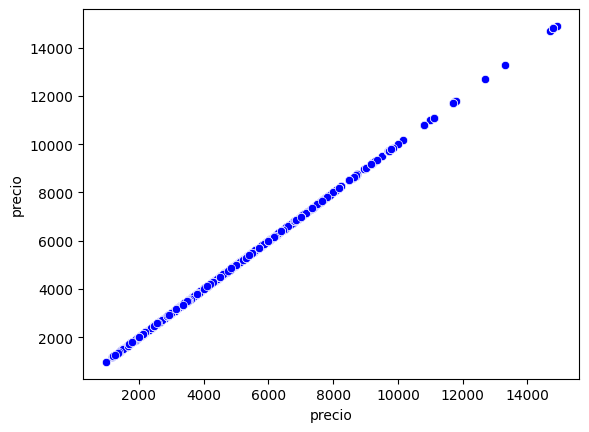

In [269]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='precio', y='precio', color="blue", data=df)
sns.scatterplot(x=y_pred, y= y_pred, color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [34]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Var_Indep, y=Var_Dep)
coef_Deter

0.5092464792602145

In [35]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.713615077797698

Precio vs Monto financiado

In [271]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Var_Indep2= df13[['monto_financiado']]
Var_Dep2= df13['precio']

In [272]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep2, y=Var_Dep2)

LinearRegression()

In [273]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['monto_financiado'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.2091373]),
 'rank_': 1,
 'singular_': array([84299.40424413]),
 'intercept_': 332.04949523290406}

Modelo matemático: 1.2091373x + 332.04949523290406

In [274]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Var_Indep2,Var_Dep2)

0.8742199283071936

In [275]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['monto_financiado']])
y_pred2= model.predict(X=df13[['monto_financiado']])
y_pred2

array([2688.65810262, 2108.27219623, 2108.27219623, ..., 5412.84445071,
       3619.69382744, 2709.00788346])

<Axes: xlabel='precio', ylabel='precio'>

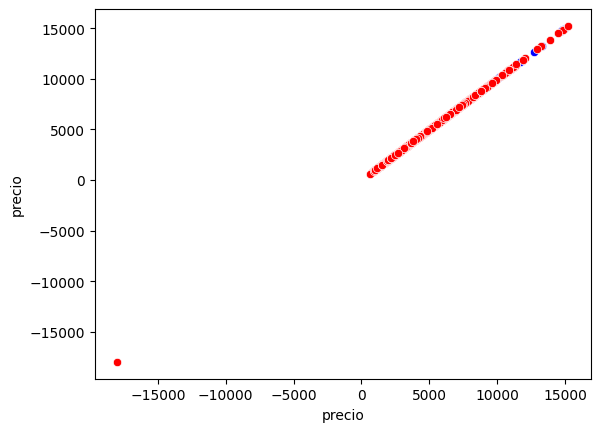

In [277]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='precio', y='precio', color="blue", data=df)
sns.scatterplot(x='Predicciones2', y= 'Predicciones2', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [278]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2=model.score(X=Var_Indep2, y=Var_Dep2)
coef_Deter2

0.8742199283071936

In [279]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

0.9349972878608759

Precio vs Costo total

In [280]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Var_Indep3= df13[['costo_total']]
Var_Dep3= df13['precio']

In [281]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep3, y=Var_Dep3)

LinearRegression()

In [282]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['costo_total'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.80271951]),
 'rank_': 1,
 'singular_': array([126970.3346069]),
 'intercept_': 323.96887909424504}

Modelo matemático = 0.80271951x + 323.96887909424504

In [283]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Var_Indep3,Var_Dep3)

0.8740828728570156

In [284]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['costo_total']])
y_pred3= model.predict(X=df13[['costo_total']])
y_pred3

array([2671.92343165, 2097.97898547, 2097.97898547, ..., 5385.11535906,
       3600.66989911, 2692.79413879])

<Axes: xlabel='precio', ylabel='precio'>

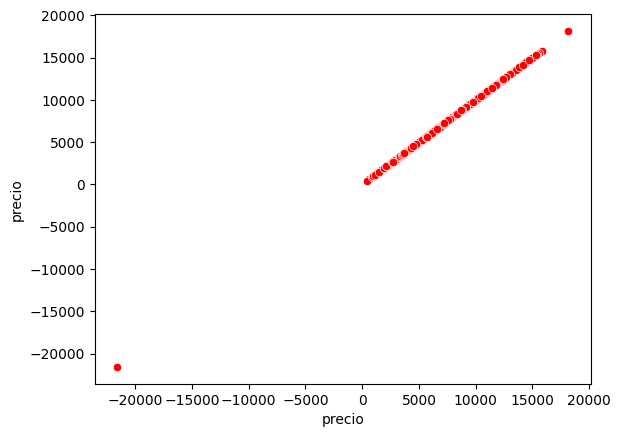

In [286]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='precio', y='precio', color="blue", data=df)
sns.scatterplot(x='Predicciones3', y= 'Predicciones3', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [287]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3=model.score(X=Var_Indep3, y=Var_Dep3)
coef_Deter3

0.8740828728570156

In [288]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl3=np.sqrt(coef_Deter3)
coef_Correl3

0.9349239930908906

Costo total vs Monto financiado

In [289]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Var_Indep4= df13[['monto_financiado']]
Var_Dep4= df13['costo_total']

In [290]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep4, y=Var_Dep4)

LinearRegression()

In [291]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['monto_financiado'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.50430687]),
 'rank_': 1,
 'singular_': array([84299.40424413]),
 'intercept_': 15.556822457987437}

Modelo matemático: 1.50430687x + 15.556822457987437


In [292]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Var_Indep4,Var_Dep4)

0.9975102374145094

In [293]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['monto_financiado']])
y_pred4= model.predict(X=df13[['monto_financiado']])
y_pred4

array([2947.45091587, 2225.38361734, 2225.38361734, ..., 6336.65429836,
       4105.76720727, 2972.76840053])

<Axes: xlabel='costo_total', ylabel='costo_total'>

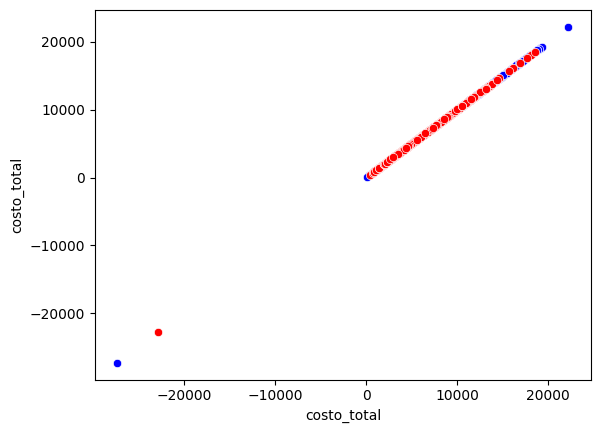

In [294]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='costo_total', y='costo_total', color="blue", data=df)
sns.scatterplot(x='Predicciones4', y= 'Predicciones4', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [295]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter4=model.score(X=Var_Indep4, y=Var_Dep4)
coef_Deter4

0.9975102374145094

In [296]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl4

0.99875434287642

Precio vs Semana

In [297]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Var_Indep5= df13[['semana']]
Var_Dep5= df13['precio']

In [298]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep5, y=Var_Dep5)

LinearRegression()

In [299]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['semana'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([10.43050015]),
 'rank_': 1,
 'singular_': array([9770.73926488]),
 'intercept_': 324.543593405348}

Modelo matemático: 10.43050015x + 324.543593405348

In [300]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Var_Indep5,Var_Dep5)

0.8739479461555277

In [301]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['semana']])
y_pred5= model.predict(X=df13[['semana']])
y_pred5

array([2671.40612706, 2097.72861883, 2097.72861883, ..., 5383.33616595,
       3599.72064037, 2775.71112855])

<Axes: xlabel='precio', ylabel='precio'>

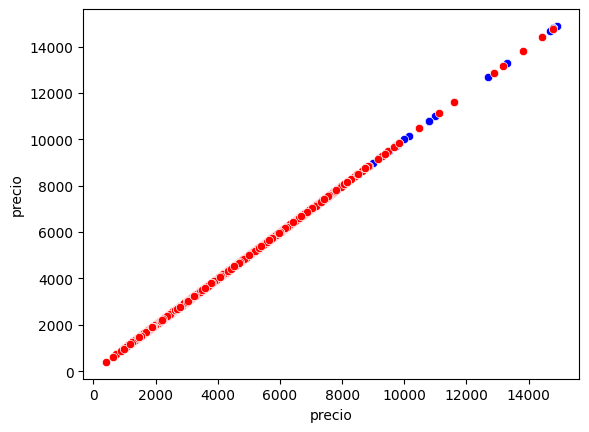

In [303]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='precio', y='precio', color="blue", data=df13)
sns.scatterplot(x='Predicciones5', y= 'Predicciones5', color="red", data=df13)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [304]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter5=model.score(X=Var_Indep5, y=Var_Dep5)
coef_Deter5

0.8739479461555277

In [305]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl5=np.sqrt(coef_Deter5)
coef_Correl5

0.9348518311238031

Precio vs Pagos realizados

In [306]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Var_Indep6= df13[['pagos_realizados']]
Var_Dep6= df13['precio']

In [307]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep6, y=Var_Dep6)

LinearRegression()

In [308]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['pagos_realizados'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-3.19582487]),
 'rank_': 1,
 'singular_': array([437.83940616]),
 'intercept_': 3681.4327013753264}

Modelo matemático: -3.19582487x + 3681.4327013753264

In [309]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Var_Indep6,Var_Dep6)

0.00016474645829955836

In [310]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['semana']])
y_pred6= model.predict(X=df13[['pagos_realizados']])
y_pred6

array([3681.43270138, 3681.43270138, 3681.43270138, ..., 3681.43270138,
       3681.43270138, 3681.43270138])

<Axes: xlabel='precio', ylabel='precio'>

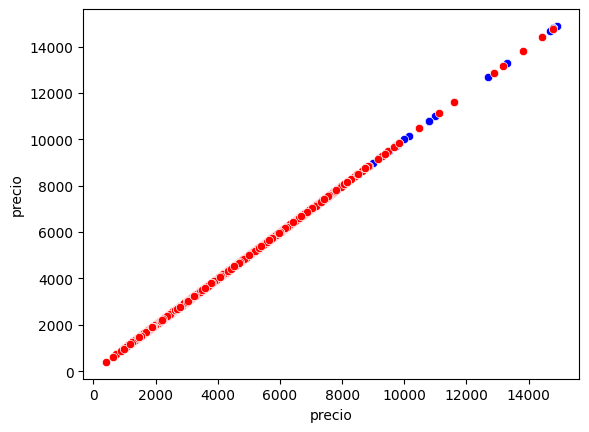

In [312]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='precio', y='precio', color="blue", data=df13)
sns.scatterplot(x='Predicciones6', y= 'Predicciones6', color="red", data=df13)

In [313]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter6=model.score(X=Var_Indep6, y=Var_Dep6)
coef_Deter6

0.00016474645829955836

In [314]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl6=np.sqrt(coef_Deter6)
coef_Correl6

0.01283535968719063

In [315]:
#Unimos las variables utilizadas en un nuevo dataframe
df_ejercicio13= df13[["precio", "monto_financiado", "costo_total", "semana", "pagos_realizados"]]

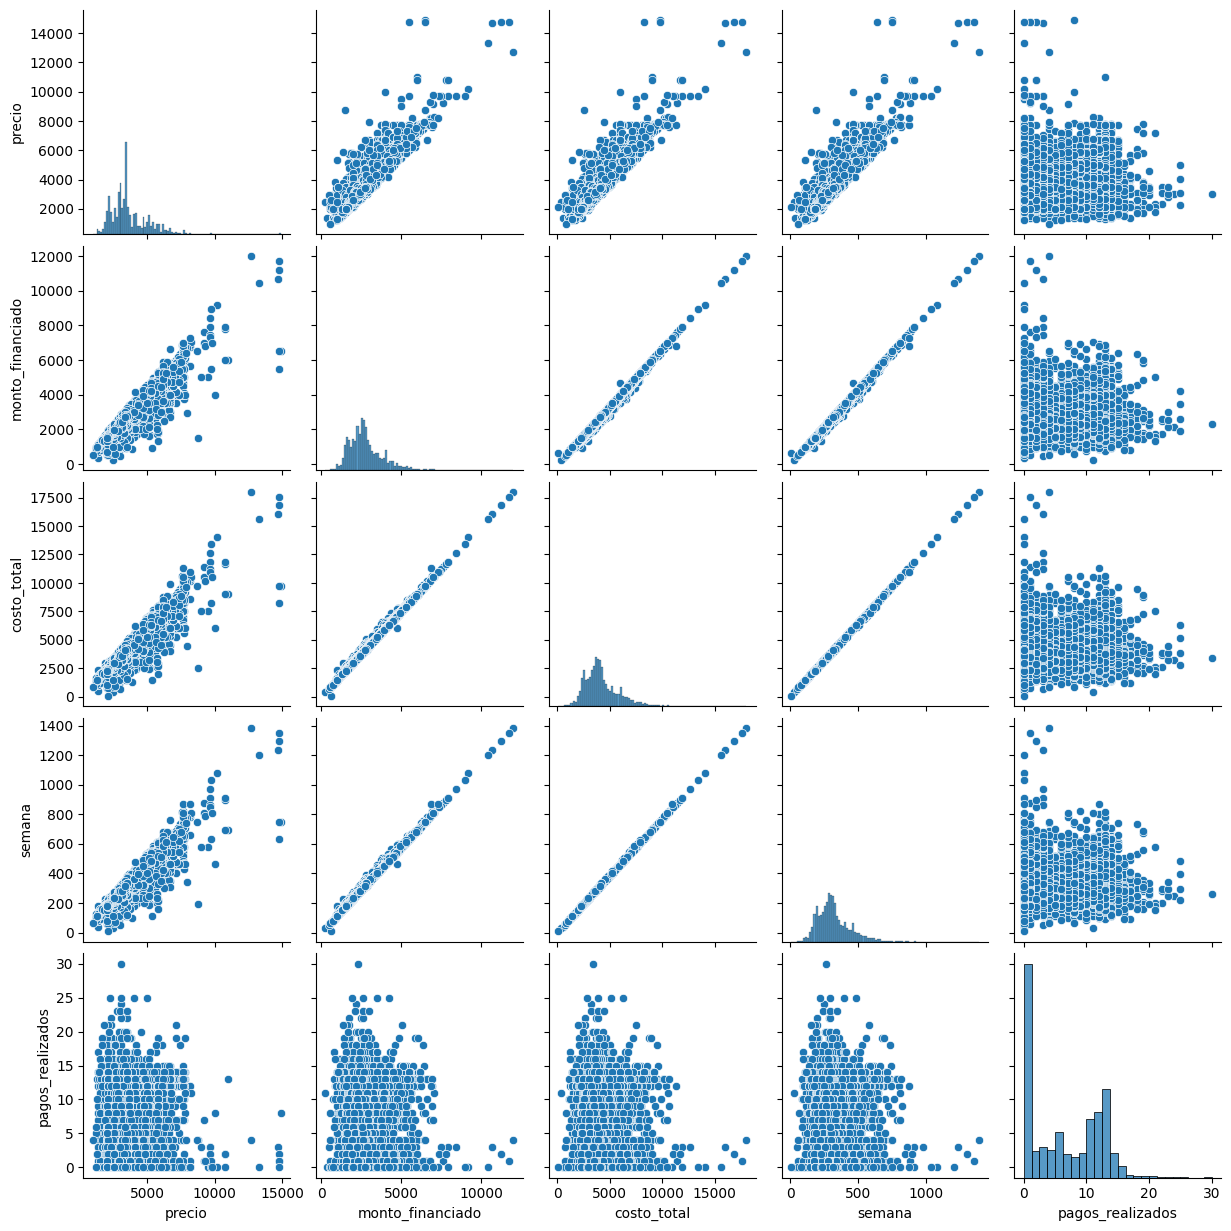

In [316]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(df_ejercicio13)

In [317]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors13=df_ejercicio13.corr()
Corr_Factors13

,precio,monto_financiado,costo_total,semana,pagos_realizados
precio,1.000000,0.934997,0.934924,0.934852,-0.012835
monto_financiado,0.934997,1.000000,0.998754,0.998732,0.002858
costo_total,0.934924,0.998754,1.000000,0.999962,0.004345
semana,0.934852,0.998732,0.999962,1.000000,0.003467
pagos_realizados,-0.012835,0.002858,0.004345,0.003467,1.000000


In [318]:
Corr_Factors13_1= abs(Corr_Factors13)
Corr_Factors13_1

,precio,monto_financiado,costo_total,semana,pagos_realizados
precio,1.000000,0.934997,0.934924,0.934852,0.012835
monto_financiado,0.934997,1.000000,0.998754,0.998732,0.002858
costo_total,0.934924,0.998754,1.000000,0.999962,0.004345
semana,0.934852,0.998732,0.999962,1.000000,0.003467
pagos_realizados,0.012835,0.002858,0.004345,0.003467,1.000000


<Axes: >

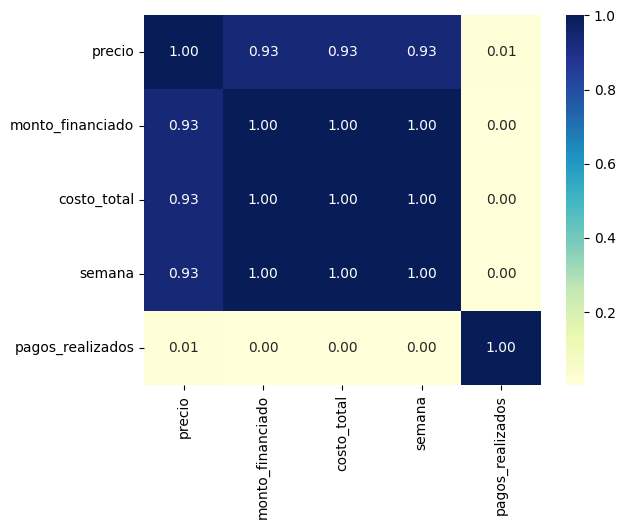

In [319]:
#Ajustamos el mapa de calor de los coeficientes de correlación
Heat_Map13= sns.heatmap(Corr_Factors13_1, cmap = 'YlGnBu', annot=True, fmt=".2f")
Heat_Map13

## ***PLAZO: 26 SEMANAS***

## **Precio vs Enganche**

In [320]:
df26 = df[df["plazo"]== "26S"]

In [321]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Var_Indep= df26[['enganche']]
Var_Dep= df26['precio']

In [322]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [323]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [324]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep, y=Var_Dep)

LinearRegression()

In [325]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['enganche'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.74922073]),
 'rank_': 1,
 'singular_': array([49544.41336678]),
 'intercept_': 2344.8752177375172}

Modelo matemático: y= 1.74922073x + 2344.8752177375172

In [326]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Var_Indep,Var_Dep)

0.4340111213418768

In [327]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['enganche']])
y_pred= model.predict(X=df26[['enganche']])
y_pred

array([3709.26738468, 3656.79076288, 3919.1738719 , ..., 4459.6830765 ,
       4359.97749507, 4244.5289271 ])

ValueError: ignored

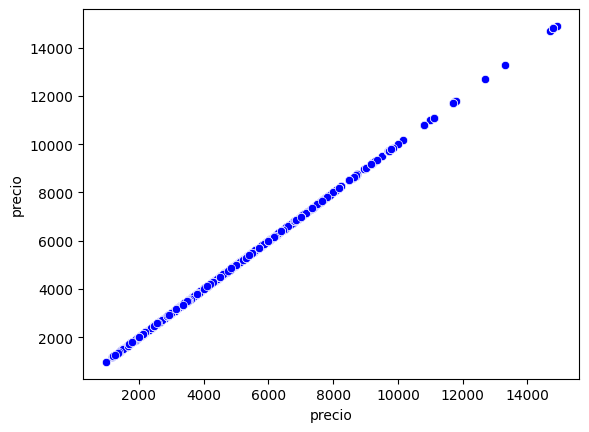

In [329]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='precio', y='precio', color="blue", data=df)
sns.scatterplot(x=y_pred, y= y_pred, color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [330]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Var_Indep, y=Var_Dep)
coef_Deter

0.4340111213418768

In [331]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.6587952044010922

Precio vs Monto financiado

In [332]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Var_Indep2= df26[['monto_financiado']]
Var_Dep2= df26['precio']

In [333]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep2, y=Var_Dep2)

LinearRegression()

In [334]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['monto_financiado'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.16314745]),
 'rank_': 1,
 'singular_': array([105780.42692706]),
 'intercept_': 424.53503345742683}

Modelo matemático: y= 1.16314745x + 424.53503345742683

In [335]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Var_Indep2,Var_Dep2)

0.87478720863152

In [336]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['monto_financiado']])
y_pred2= model.predict(X=df26[['monto_financiado']])
y_pred2

array([1784.25440166, 3040.45364688, 2865.98152949, ..., 3787.19430932,
       4724.69115344, 5441.18998219])

<Axes: xlabel='precio', ylabel='precio'>

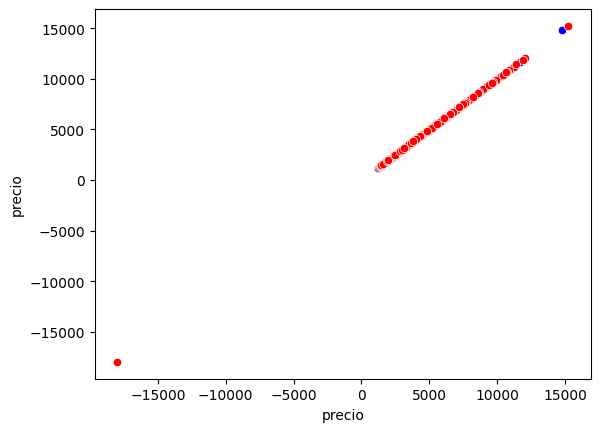

In [337]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='precio', y='precio', color="blue", data=df26)
sns.scatterplot(x='Predicciones2', y= 'Predicciones2', color="red", data=df26)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [338]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2=model.score(X=Var_Indep2, y=Var_Dep2)
coef_Deter2

0.87478720863152

In [339]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

0.9353005980066088

Precio vs Costo total

In [340]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Var_Indep3= df26[['costo_total']]
Var_Dep3= df26['precio']

In [341]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep3, y=Var_Dep3)

LinearRegression()

In [342]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['costo_total'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.64293612]),
 'rank_': 1,
 'singular_': array([191321.60384243]),
 'intercept_': 408.26305201739115}

Modelo matematico: y= 0.64293612x + 408.26305201739115

In [343]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Var_Indep3,Var_Dep3)

0.8743512396787007

In [344]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['costo_total']])
y_pred3= model.predict(X=df26[['costo_total']])
y_pred3

array([1762.28653093, 3016.01197437, 2832.13224266, ..., 3751.53090118,
       4687.64589895, 5406.44848652])

<Axes: xlabel='precio', ylabel='precio'>

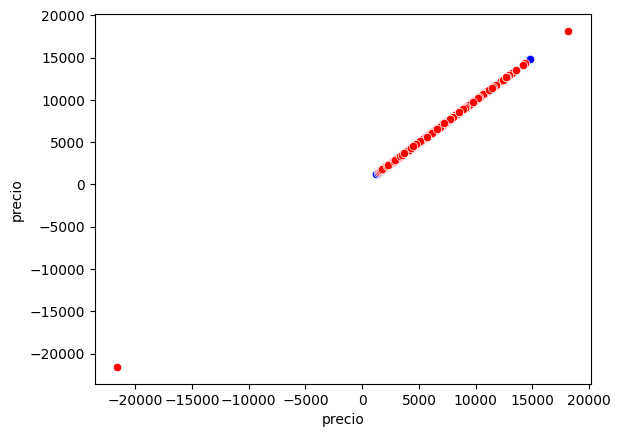

In [345]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='precio', y='precio', color="blue", data=df26)
sns.scatterplot(x='Predicciones3', y= 'Predicciones3', color="red", data=df26)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [346]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3=model.score(X=Var_Indep3, y=Var_Dep3)
coef_Deter3

0.8743512396787007

In [347]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl3=np.sqrt(coef_Deter3)
coef_Correl3

0.9350675054126845

Costo total vs Monto financiado

In [348]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Var_Indep4= df26[['monto_financiado']]
Var_Dep4= df26['costo_total']

In [349]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep4, y=Var_Dep4)

LinearRegression()

In [350]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['monto_financiado'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.80373141]),
 'rank_': 1,
 'singular_': array([105780.42692706]),
 'intercept_': 41.71691343351995}

Modelo matematico: y= 1.80373141x + 41.71691343351995

In [351]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Var_Indep4,Var_Dep4)

0.9945493537003304

In [352]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['monto_financiado']])
y_pred4= model.predict(X=df26[['monto_financiado']])
y_pred4

array([2150.27892711, 4098.30884564, 3827.74913473, ..., 5256.30440832,
       6710.1119216 , 7821.21046773])

<Axes: xlabel='costo_total', ylabel='costo_total'>

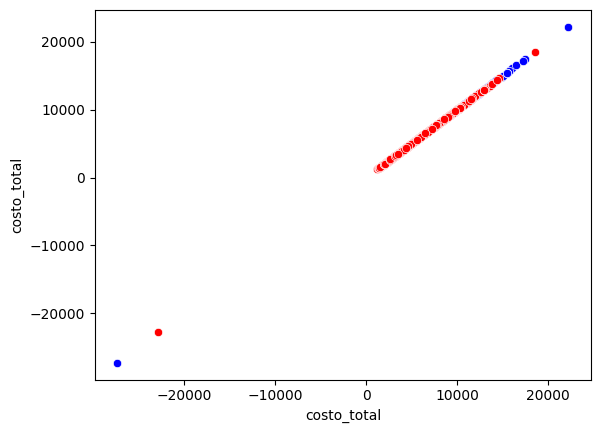

In [353]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='costo_total', y='costo_total', color="blue", data=df26)
sns.scatterplot(x='Predicciones4', y= 'Predicciones4', color="red", data=df26)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [354]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter4=model.score(X=Var_Indep4, y=Var_Dep4)
coef_Deter4

0.9945493537003304

In [355]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl4

0.9972709530014049

Precio vs Semana

In [356]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Var_Indep5= df26[['semana']]
Var_Dep5= df26['precio']

In [357]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep5, y=Var_Dep5)

LinearRegression()

In [358]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['semana'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([16.70213635]),
 'rank_': 1,
 'singular_': array([7363.529792]),
 'intercept_': 409.9039869780004}

Modelo matematico: y= 16.70213635x + 409.9039869780004

In [359]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Var_Indep5,Var_Dep5)

0.8740542600491044

In [360]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['semana']])
y_pred5= model.predict(X=df26[['semana']])
y_pred5

array([1762.77703129, 3015.4372575 , 2831.71375765, ..., 3750.33125687,
       4685.65089245, 5403.84275547])

<Axes: xlabel='precio', ylabel='precio'>

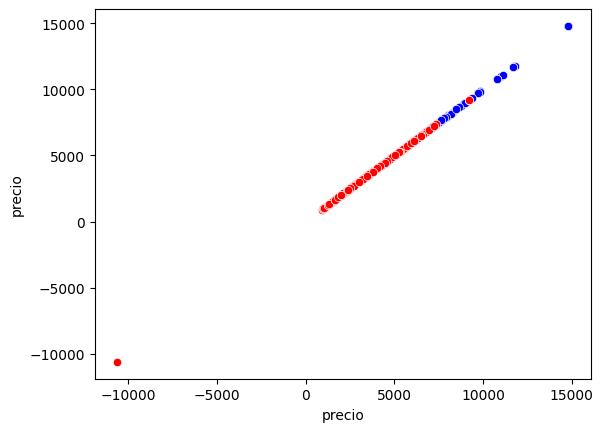

In [361]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='precio', y='precio', color="blue", data=df26)
sns.scatterplot(x='Predicciones5', y= 'Predicciones5', color="red", data=df26)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [362]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter5=model.score(X=Var_Indep5, y=Var_Dep5)
coef_Deter5

0.8740542600491044

In [363]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl5=np.sqrt(coef_Deter5)
coef_Correl5

0.9349086907549338

Precio vs Pagos realizados

In [364]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Var_Indep6= df26[['pagos_realizados']]
Var_Dep6= df26['precio']

In [365]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep6, y=Var_Dep6)

LinearRegression()

In [366]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['pagos_realizados'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-7.19499868]),
 'rank_': 1,
 'singular_': array([970.98460419]),
 'intercept_': 4045.6906510491444}

Modelo matematico: y= -7.19499868x + 4045.6906510491444

In [367]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Var_Indep6,Var_Dep6)

0.002820384848167712

In [368]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['semana']])
y_pred6= model.predict(X=df26[['pagos_realizados']])
y_pred6

array([4045.69065105, 4045.69065105, 4045.69065105, ..., 4045.69065105,
       4045.69065105, 4045.69065105])

<Axes: xlabel='precio', ylabel='precio'>

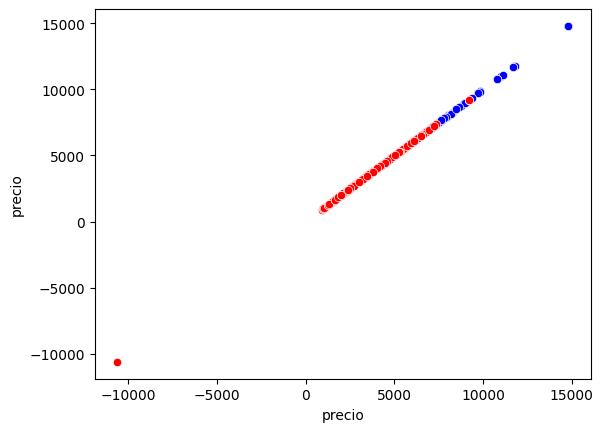

In [369]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='precio', y='precio', color="blue", data=df26)
sns.scatterplot(x='Predicciones6', y= 'Predicciones6', color="red", data=df26)

In [370]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter6=model.score(X=Var_Indep6, y=Var_Dep6)
coef_Deter6

0.002820384848167712

In [371]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl6=np.sqrt(coef_Deter6)
coef_Correl6

0.05310729562091928

In [372]:
#Unimos las variables utilizadas en un nuevo dataframe
df_ejercicio26= df26[["precio", "monto_financiado", "costo_total", "semana", "pagos_realizados"]]

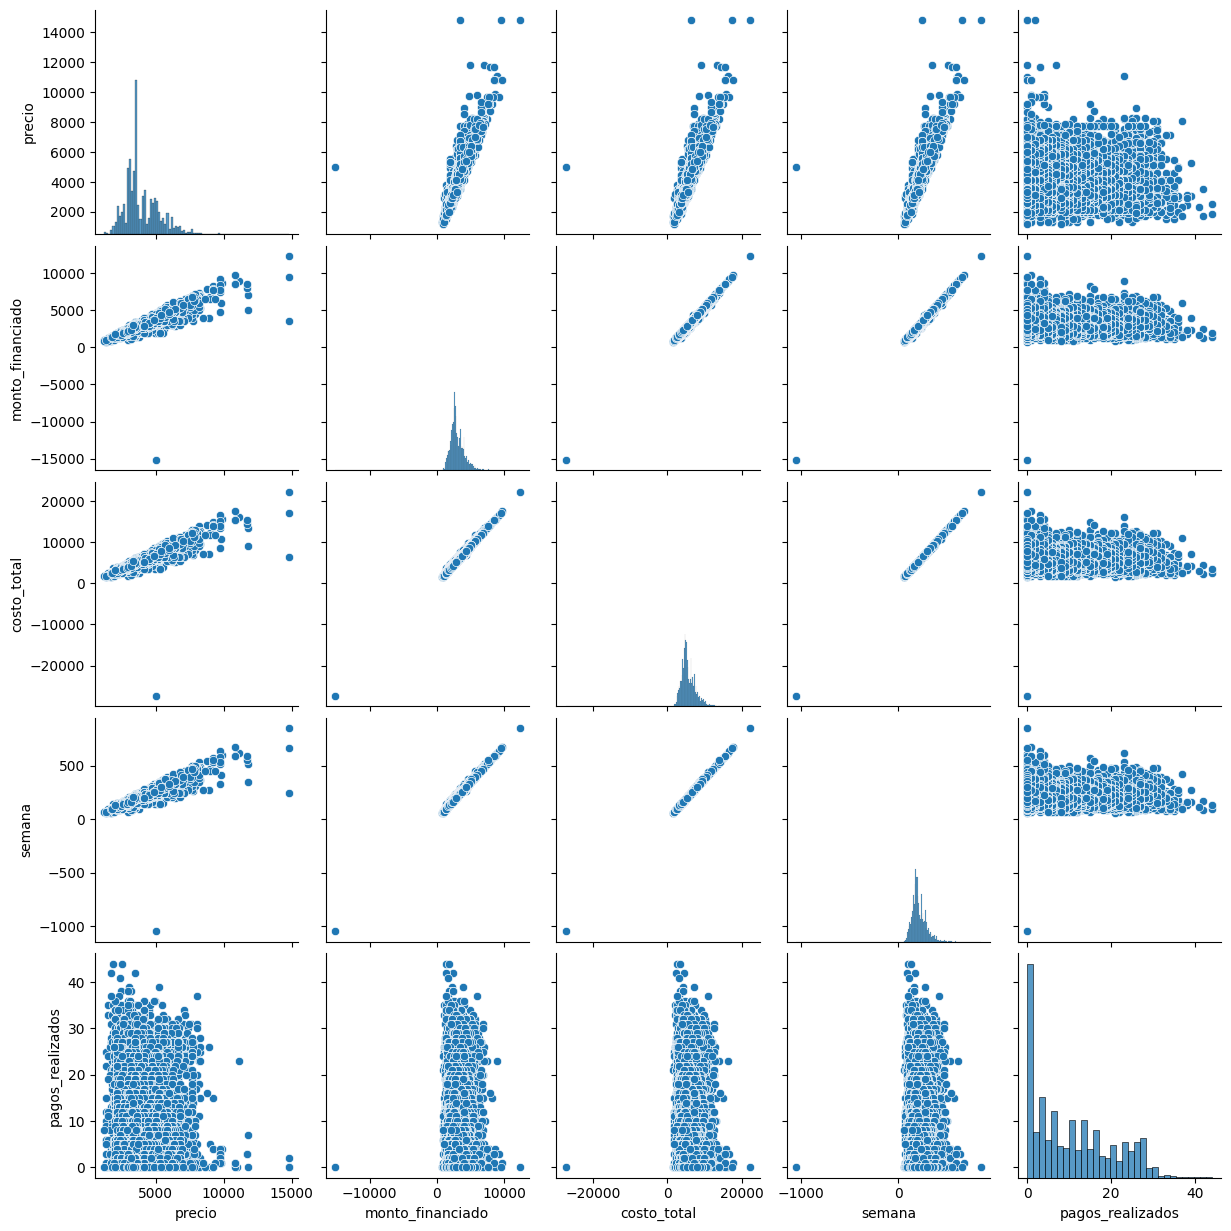

In [373]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(df_ejercicio26)

In [374]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors26=df_ejercicio26.corr()
Corr_Factors26

,precio,monto_financiado,costo_total,semana,pagos_realizados
precio,1.000000,0.935301,0.935068,0.934909,-0.053107
monto_financiado,0.935301,1.000000,0.997271,0.997222,-0.016780
costo_total,0.935068,0.997271,1.000000,0.999912,-0.013196
semana,0.934909,0.997222,0.999912,1.000000,-0.014528
pagos_realizados,-0.053107,-0.016780,-0.013196,-0.014528,1.000000


In [375]:
Corr_Factors26_1= abs(Corr_Factors26)
Corr_Factors26_1

,precio,monto_financiado,costo_total,semana,pagos_realizados
precio,1.000000,0.935301,0.935068,0.934909,0.053107
monto_financiado,0.935301,1.000000,0.997271,0.997222,0.016780
costo_total,0.935068,0.997271,1.000000,0.999912,0.013196
semana,0.934909,0.997222,0.999912,1.000000,0.014528
pagos_realizados,0.053107,0.016780,0.013196,0.014528,1.000000


<Axes: >

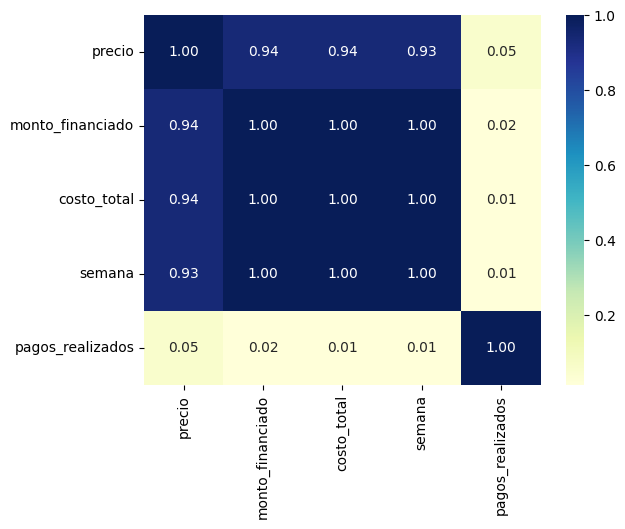

In [376]:
#Ajustamos el mapa de calor de los coeficientes de correlación
Heat_Map26= sns.heatmap(Corr_Factors26_1, cmap = 'YlGnBu', annot=True, fmt=".2f")
Heat_Map26

## ***PLAZO: 39 SEMANAS***

## **Precio vs Enganche**

In [377]:
df39 = df[df["plazo"]== "39S"]

In [378]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Var_Indep= df39[['enganche']]
Var_Dep= df39['precio']

In [379]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [380]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep, y=Var_Dep)

LinearRegression()

In [381]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['enganche'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([2.56335347]),
 'rank_': 1,
 'singular_': array([28578.13144446]),
 'intercept_': 2000.2644673166878}

Modelo matematico: y=2.56335347x + 2000.2644673166878

In [382]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Var_Indep,Var_Dep)

0.5427728768025772

In [383]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['enganche']])
y_pred= model.predict(X=df[['enganche']])
y_pred

array([3999.68017576, 4691.7856133 , 3256.30766878, ..., 4953.24766748,
       9175.09083646, 4784.0663383 ])

ValueError: ignored

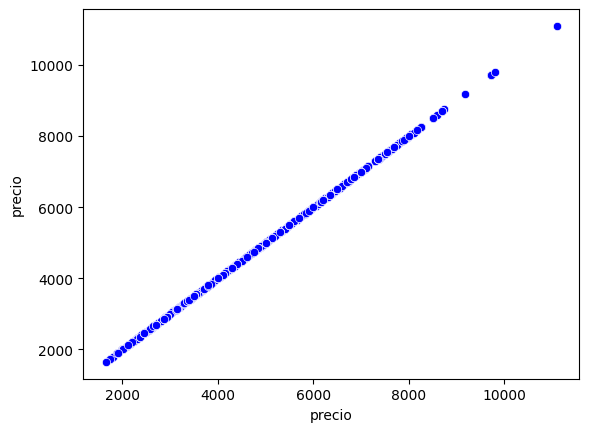

In [385]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='precio', y='precio', color="blue", data=df39)
sns.scatterplot(x=y_pred, y= y_pred, color="red", data=df39)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [386]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Var_Indep, y=Var_Dep)
coef_Deter

0.5427728768025772

In [387]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.7367312106885232

Precio vs Monto financiado

In [388]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Var_Indep2= df39[['monto_financiado']]
Var_Dep2= df39['precio']

In [389]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep2, y=Var_Dep2)

LinearRegression()

In [390]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['monto_financiado'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.19452767]),
 'rank_': 1,
 'singular_': array([80781.8538581]),
 'intercept_': 255.80300299130522}

Modelo matematico: y= 1.19452767x + 255.80300299130522

In [391]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Var_Indep2,Var_Dep2)

0.9417888410056129

In [392]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['monto_financiado']])
y_pred2= model.predict(X=df[['monto_financiado']])
y_pred2

array([1652.20584408, 2583.93742325, 2010.56414376, ..., 4671.97178272,
       8617.49666219, 5407.80082472])

<Axes: xlabel='precio', ylabel='precio'>

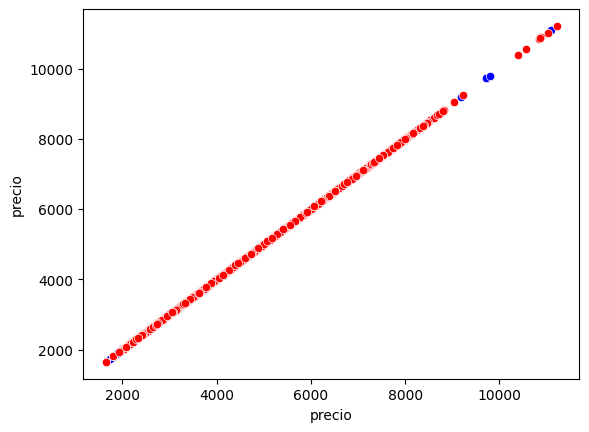

In [393]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='precio', y='precio', color="blue", data=df39)
sns.scatterplot(x='Predicciones2', y= 'Predicciones2', color="red", data=df39)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [394]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2=model.score(X=Var_Indep2, y=Var_Dep2)
coef_Deter2

0.9417888410056129

In [395]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

0.9704580573139743

Precio vs Costo total

In [396]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Var_Indep3= df39[['costo_total']]
Var_Dep3= df39['precio']

In [397]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep3, y=Var_Dep3)

LinearRegression()

In [398]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['costo_total'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.55269643]),
 'rank_': 1,
 'singular_': array([174430.03772254]),
 'intercept_': 233.07182448258027}

Modelo matematico: y= 0.5526964x + 233.0718244825802

In [399]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Var_Indep3,Var_Dep3)

0.9400465442403917

In [400]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['costo_total']])
y_pred3= model.predict(X=df[['costo_total']])
y_pred3

array([1397.05051277, 1849.70889155, 1454.53094182, ..., 3911.81928377,
       8553.36392966, 4529.73389607])

<Axes: xlabel='precio', ylabel='precio'>

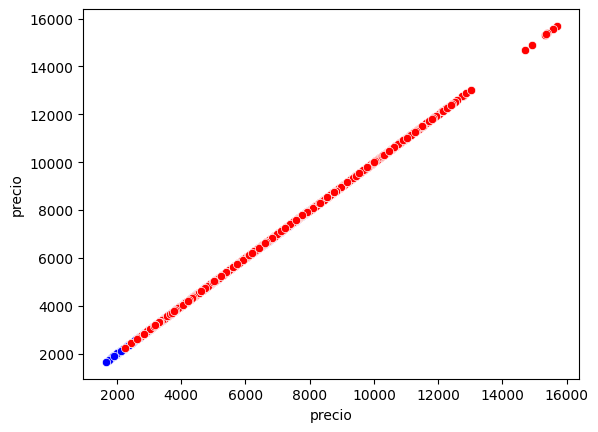

In [401]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='precio', y='precio', color="blue", data=df39)
sns.scatterplot(x='Predicciones3', y= 'Predicciones3', color="red", data=df39)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [402]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3=model.score(X=Var_Indep3, y=Var_Dep3)
coef_Deter3

0.9400465442403917

In [403]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl3=np.sqrt(coef_Deter3)
coef_Correl3

0.9695599745453561

Costo total vs Monto financiado

In [404]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Var_Indep4= df39[['monto_financiado']]
Var_Dep4= df39['costo_total']

In [405]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep4, y=Var_Dep4)

LinearRegression()

In [406]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['monto_financiado'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([2.15218174]),
 'rank_': 1,
 'singular_': array([80781.8538581]),
 'intercept_': 72.71052239508845}

Modelo mateamtico: y= 2.15218174x + 72.71052239508845

In [407]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Var_Indep4,Var_Dep4)

0.9934430305473929

In [408]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['monto_financiado']])
y_pred4= model.predict(X=df[['monto_financiado']])
y_pred4

array([ 2588.61097932,  4267.31273843,  3234.26550206, ...,
        8029.32642424, 15137.98271955,  9355.07037759])

<Axes: xlabel='costo_total', ylabel='costo_total'>

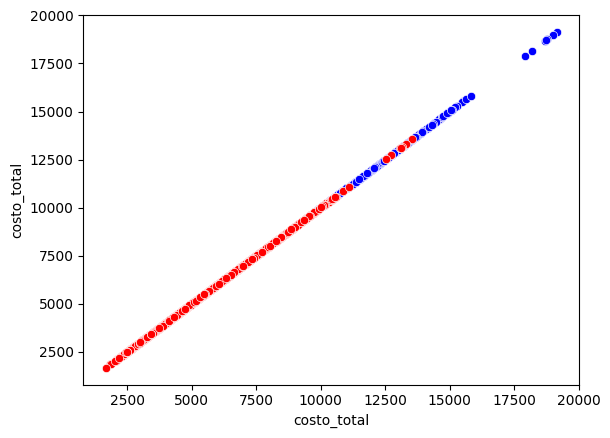

In [409]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='costo_total', y='costo_total', color="blue", data=df39)
sns.scatterplot(x='Predicciones4', y= 'Predicciones4', color="red", data=df39)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [410]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter4=model.score(X=Var_Indep4, y=Var_Dep4)
coef_Deter4

0.9934430305473929

In [411]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl4

0.9967161233507728

Precio vs Semana

In [412]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Var_Indep5= df39[['semana']]
Var_Dep5= df39['precio']

In [413]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep5, y=Var_Dep5)

LinearRegression()

In [414]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['semana'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([21.53187988]),
 'rank_': 1,
 'singular_': array([4476.26643656]),
 'intercept_': 235.69117101243228}

Modelo matematico: y= 21.53187988x + 235.69117101243228

In [415]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Var_Indep5,Var_Dep5)

0.9395702092999242

In [416]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['semana']])
y_pred5= model.predict(X=df39[['semana']])
y_pred5

array([4068.36579001, 4326.7483486 , 3809.98323143, ..., 6350.74505751,
       3960.7063906 , 8546.99680547])

<Axes: xlabel='precio', ylabel='precio'>

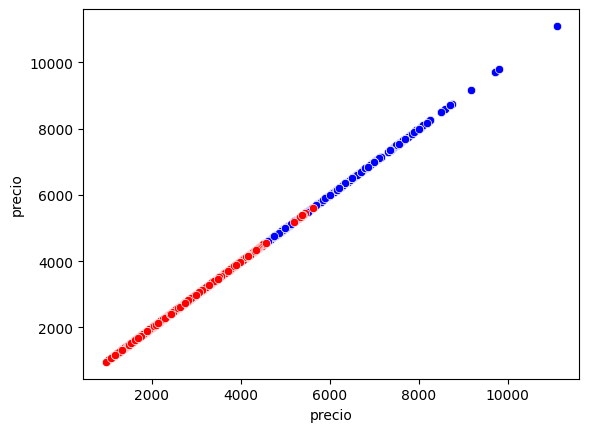

In [417]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='precio', y='precio', color="blue", data=df39)
sns.scatterplot(x='Predicciones5', y= 'Predicciones5', color="red", data=df39)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [418]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter5=model.score(X=Var_Indep5, y=Var_Dep5)
coef_Deter5

0.9395702092999242

In [419]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl5=np.sqrt(coef_Deter5)
coef_Correl5

0.9693142985120585

Precio vs Pagos realizados

In [420]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Var_Indep6= df39[['pagos_realizados']]
Var_Dep6= df39['precio']

In [421]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep6, y=Var_Dep6)

LinearRegression()

In [422]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['pagos_realizados'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-1.47259501]),
 'rank_': 1,
 'singular_': array([856.64456593]),
 'intercept_': 4424.219788667905}

Modelo matematico: y= -1.47259501x + 4424.219788667905

In [423]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Var_Indep6,Var_Dep6)

0.00016095388446735193

In [424]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['semana']])
y_pred6= model.predict(X=df39[['pagos_realizados']])
y_pred6

array([4424.21978867, 4408.02124354, 4375.6241533 , ..., 4424.21978867,
       4424.21978867, 4424.21978867])

<Axes: xlabel='precio', ylabel='precio'>

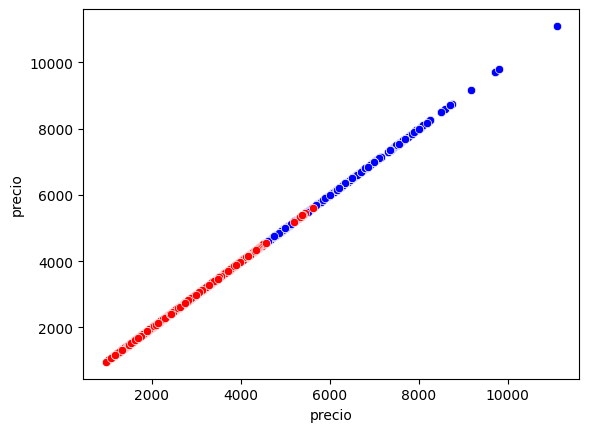

In [425]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='precio', y='precio', color="blue", data=df39)
sns.scatterplot(x='Predicciones6', y= 'Predicciones6', color="red", data=df39)

In [426]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter6=model.score(X=Var_Indep6, y=Var_Dep6)
coef_Deter6

0.00016095388446735193

In [427]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl6=np.sqrt(coef_Deter6)
coef_Correl6

0.012686760203745947

In [428]:
#Unimos las variables utilizadas en un nuevo dataframe
df_ejercicio39= df39[["precio", "monto_financiado", "costo_total", "semana", "pagos_realizados"]]

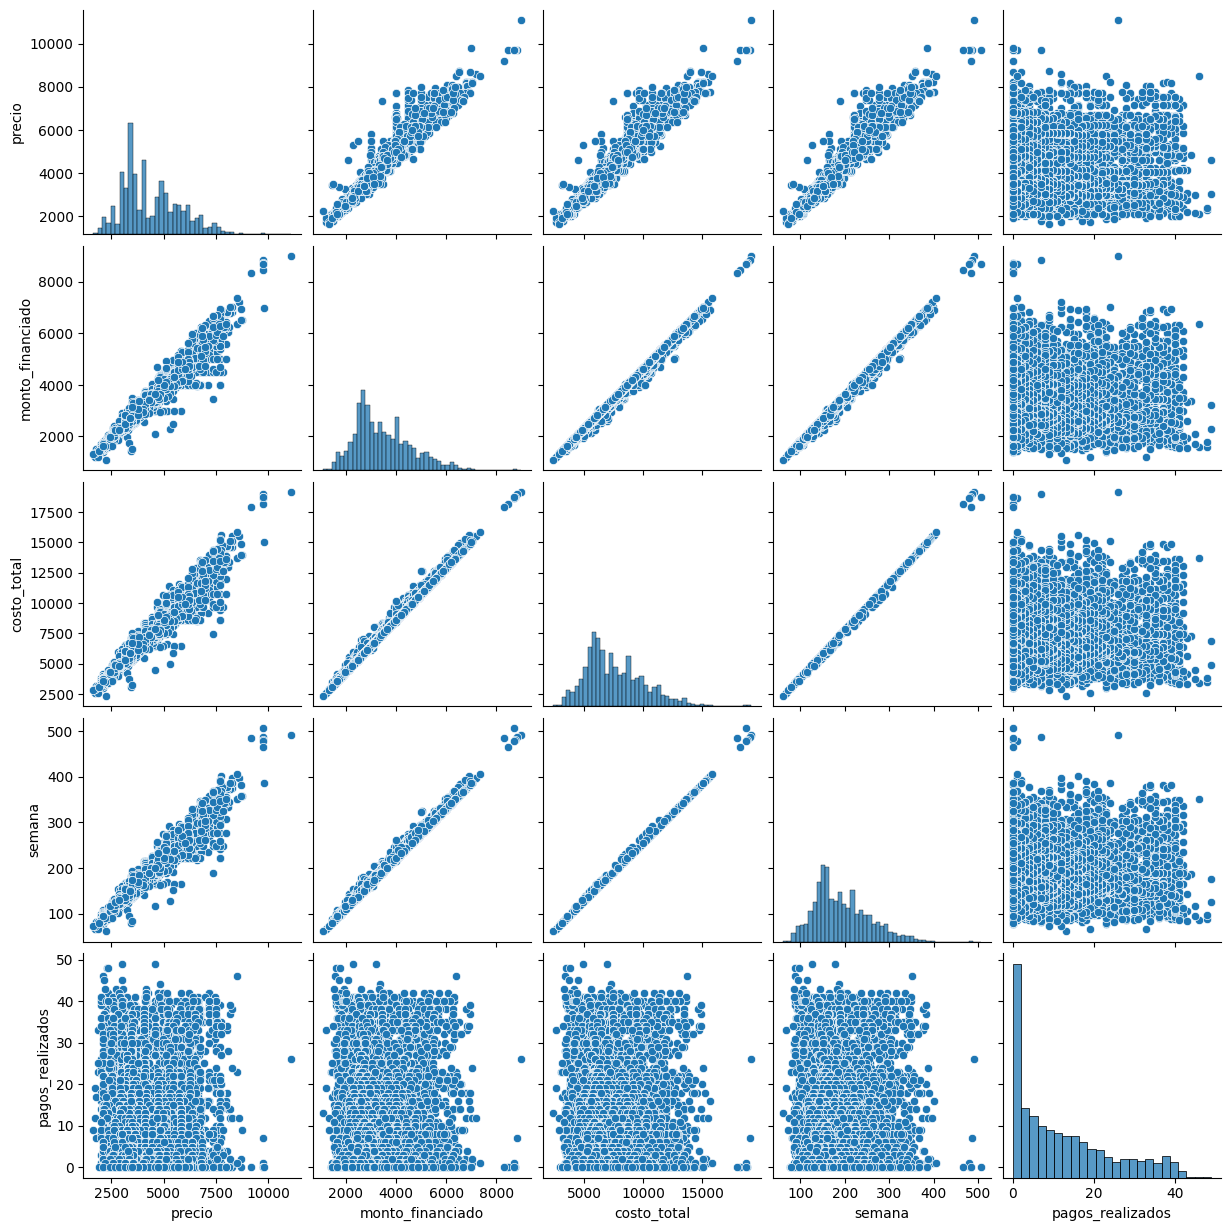

In [429]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(df_ejercicio39)

In [430]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors39=df_ejercicio39.corr()
Corr_Factors39

,precio,monto_financiado,costo_total,semana,pagos_realizados
precio,1.000000,0.970458,0.969560,0.969314,-0.012687
monto_financiado,0.970458,1.000000,0.996716,0.996620,0.016281
costo_total,0.969560,0.996716,1.000000,0.999858,0.016615
semana,0.969314,0.996620,0.999858,1.000000,0.015094
pagos_realizados,-0.012687,0.016281,0.016615,0.015094,1.000000


In [431]:
Corr_Factors39_1= abs(Corr_Factors39)
Corr_Factors39_1

,precio,monto_financiado,costo_total,semana,pagos_realizados
precio,1.000000,0.970458,0.969560,0.969314,0.012687
monto_financiado,0.970458,1.000000,0.996716,0.996620,0.016281
costo_total,0.969560,0.996716,1.000000,0.999858,0.016615
semana,0.969314,0.996620,0.999858,1.000000,0.015094
pagos_realizados,0.012687,0.016281,0.016615,0.015094,1.000000


<Axes: >

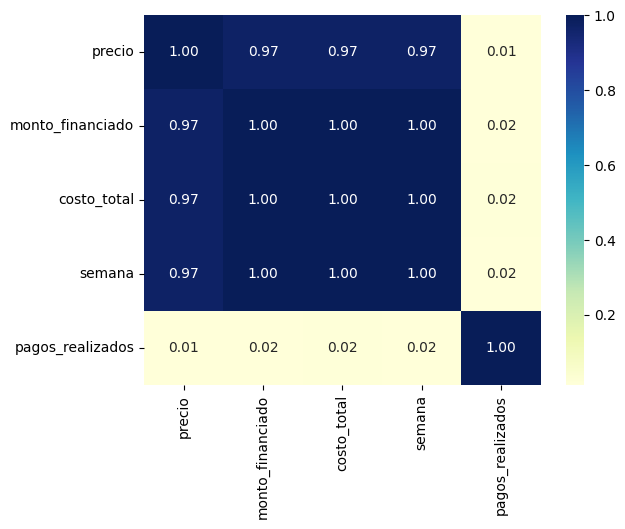

In [432]:
#Ajustamos el mapa de calor de los coeficientes de correlación
Heat_Map39= sns.heatmap(Corr_Factors39_1, cmap = 'YlGnBu', annot=True, fmt=".2f")
Heat_Map39

## ***PLAZO: 52 SEMANAS***

## **Precio vs Enganche**

In [433]:
df52 = df[df["plazo"]== "52S"]

In [434]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Var_Indep= df52[['enganche']]
Var_Dep= df52['precio']

In [435]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [436]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep, y=Var_Dep)

LinearRegression()

In [437]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['enganche'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([2.79525127]),
 'rank_': 1,
 'singular_': array([9539.63933265]),
 'intercept_': 1935.6262588679415}

El modelo matemático es: y= 2.79525127x + 1935.6262588679415

In [438]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Var_Indep,Var_Dep)

0.5588039231300744

In [439]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['enganche']])
y_pred= model.predict(X=df52[['enganche']])
y_pred

array([4032.06471112, 5289.92778247, 4032.06471112, 5150.16521899,
       4387.06162237, 3500.96696988, 4879.02584583, 4879.02584583,
       4224.93704873, 4387.06162237, 5407.3283358 , 4507.25742696,
       5150.16521899, 3500.96696988, 7570.85281852, 4060.01722382,
       3551.28149274, 4224.93704873, 7101.25060522, 4879.02584583,
       7101.25060522, 4879.02584583, 5359.80906421, 6240.31321416,
       5600.2006734 , 3584.82450797, 4879.02584583, 3654.70578971,
       4387.06162237, 5600.2006734 , 5600.2006734 , 4484.89541681,
       4702.92501584, 7134.79362045, 7805.65392517, 4426.19514014,
       8697.3390802 , 4426.19514014, 3682.65830241, 4426.19514014,
       4426.19514014, 5988.74059989, 5600.2006734 , 3542.89573893,
       4923.74986614, 6240.31321416, 4702.92501584, 4828.71132298,
       3551.28149274, 4465.32865792, 6318.58024971, 3732.97282527,
       5519.13838658, 6332.55650606, 4241.70855635, 3855.96388113,
       5150.16521899, 7568.05756725, 3324.86613989, 6005.51210

<Axes: xlabel='precio', ylabel='precio'>

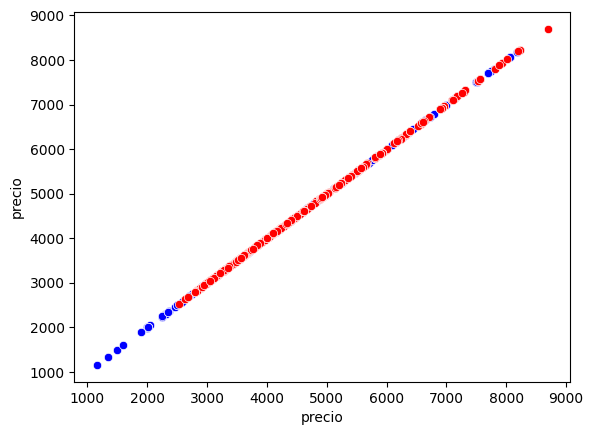

In [440]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='precio', y='precio', color="blue", data=df52)
sns.scatterplot(x=y_pred, y= y_pred, color="red", data=df52)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [441]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Var_Indep, y=Var_Dep)
coef_Deter

0.5588039231300744

In [442]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.7475318877011699

Precio vs Monto financiado

In [443]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Var_Indep2= df52[['monto_financiado']]
Var_Dep2= df52['precio']

In [444]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep2, y=Var_Dep2)

LinearRegression()

In [445]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['monto_financiado'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.19048942]),
 'rank_': 1,
 'singular_': array([29244.93858374]),
 'intercept_': 266.4357314799381}

El modelo matemático es: y=1.19048942x + 266.4357314799381

In [446]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Var_Indep2,Var_Dep2)

0.9525906985236595

In [447]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['monto_financiado']])
y_pred2= model.predict(X=df52[['monto_financiado']])
y_pred2

array([2943.84643842, 3598.61561975, 2943.84643842, 4372.43374315,
       3399.60150331, 2267.43415942, 3190.07536528, 3190.07536528,
       3190.07536528, 3399.60150331, 3715.10500956, 3550.81746952,
       4372.25516973, 2267.43415942, 7467.59909267, 2981.73971668,
       2330.29200083, 3190.07536528, 5398.49276498, 3190.07536528,
       5398.49276498, 3190.07536528, 4642.50817311, 5765.16350652,
       4947.27346478, 2372.19722843, 3190.07536528, 1973.59756063,
       3399.60150331, 4947.27346478, 4947.27346478, 2800.78532475,
       3015.27580366, 5431.96932749, 6098.64340302, 3448.43537934,
       6987.83185617, 3448.43537934, 2497.41290569, 3448.43537934,
       3448.43537934, 5443.87422169, 4947.27346478, 2319.81569393,
       3236.52826248, 5765.16350652, 3015.27580366, 3961.53631963,
       2330.29200083, 3498.61450842, 5865.16461786, 2563.87793005,
       4846.08186403, 4635.36523658, 3211.70655806, 2721.22491677,
       4372.25516973, 7462.94427904, 2042.64594702, 5465.16017

<Axes: xlabel='precio', ylabel='precio'>

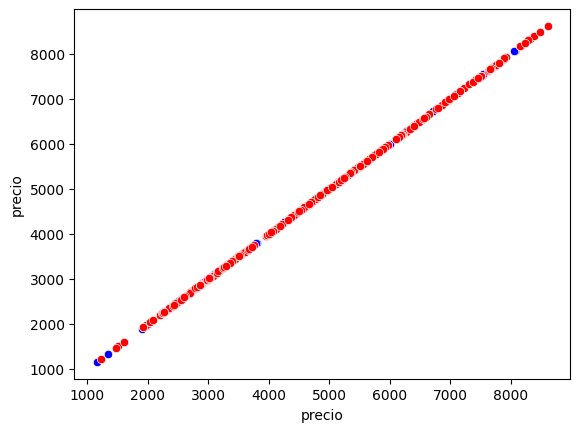

In [448]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='precio', y='precio', color="blue", data=df52)
sns.scatterplot(x=y_pred2, y= y_pred2, color="red", data=df52)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [449]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2=model.score(X=Var_Indep2, y=Var_Dep2)
coef_Deter2

0.9525906985236595

In [450]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

0.9760075299523358

Precio vs Costo total

In [451]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Var_Indep3= df52[['costo_total']]
Var_Dep3= df52['precio']

In [452]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep3, y=Var_Dep3)

LinearRegression()

In [453]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['costo_total'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.44944554]),
 'rank_': 1,
 'singular_': array([77194.78710874]),
 'intercept_': 321.3050648947301}

El modelo matemático es: y= 0.44944554x + 321.3050648947301

In [454]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Var_Indep3,Var_Dep3)

0.9459842990286769

In [455]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['costo_total']])
y_pred3= model.predict(X=df52[['costo_total']])
y_pred3

array([2938.87589525, 3593.26860284, 2938.87589525, 4341.14598294,
       3406.29925782, 2284.48318766, 3195.95874466, 3195.95874466,
       3195.95874466, 3406.29925782, 3710.12444348, 3546.52626658,
       4341.14598294, 2284.48318766, 7379.39783961, 2985.61823151,
       2354.59669205, 3195.95874466, 5369.47738058, 3195.95874466,
       5369.47738058, 3195.95874466, 4621.60000048, 5720.04490251,
       4925.42518615, 2377.96786018, 3195.95874466, 2004.02917012,
       3406.29925782, 4925.42518615, 4925.42518615, 2798.64888648,
       3008.98939964, 5392.84854871, 6047.2412563 , 3453.04159407,
       6911.97447704, 3453.04159407, 2518.19486894, 3453.04159407,
       3453.04159407, 5392.84854871, 4925.42518615, 2331.22552392,
       3242.70108092, 5720.04490251, 3008.98939964, 3943.83612476,
       2354.59669205, 3499.78393033, 5813.52957502, 2564.9372052 ,
       4808.56934551, 4598.22883235, 3219.32991279, 2728.5353821 ,
       4341.14598294, 7379.39783961, 2074.14267451, 5416.21971

<Axes: xlabel='precio', ylabel='precio'>

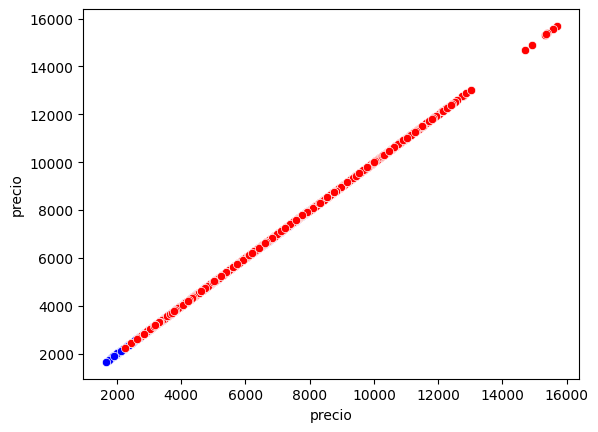

In [456]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='precio', y='precio', color="blue", data=df39)
sns.scatterplot(x='Predicciones3', y= 'Predicciones3', color="red", data=df39)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [457]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3=model.score(X=Var_Indep3, y=Var_Dep3)
coef_Deter3

0.9459842990286769

In [458]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3=model.score(X=Var_Indep3, y=Var_Dep3)
coef_Deter3

0.9459842990286769

Costo total vs Monto financiado

In [459]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Var_Indep4= df52[['monto_financiado']]
Var_Dep4= df52['costo_total']

In [460]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep4, y=Var_Dep4)

LinearRegression()

In [461]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['monto_financiado'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([2.6318465]),
 'rank_': 1,
 'singular_': array([29244.93858374]),
 'intercept_': -59.84928758190472}

El modelo matematico es: y= 2.6318465x + -59.84928758190472

In [462]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Var_Indep4,Var_Dep4)

0.9941378104412399

In [463]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['monto_financiado']])
y_pred4= model.predict(X=df52[['monto_financiado']])
y_pred4

array([ 5859.17349391,  7306.68906965,  5859.17349391,  9017.38929551,
        6866.72329002,  4363.81094879,  6403.51830578,  6403.51830578,
        6403.51830578,  6866.72329002,  7564.2152498 ,  7201.02043262,
        9016.99451854,  4363.81094879, 15859.95333279,  5942.94516805,
        4502.77244406,  6403.51830578, 11285.72515808,  6403.51830578,
       11285.72515808,  6403.51830578,  9614.4499928 , 12096.33388049,
       10288.20269715,  4595.4134409 ,  6403.51830578,  3714.21859533,
        6866.72329002, 10288.20269715, 10288.20269715,  5542.90449985,
        6017.08428399, 11359.7326817 , 12833.56672244,  6974.6816335 ,
       14799.31919275,  6974.6816335 ,  4872.23105591,  6974.6816335 ,
        6974.6816335 , 11386.05114671, 10288.20269715,  4479.61219485,
        6506.21295627, 12096.33388049,  6017.08428399,  8109.00747558,
        4502.77244406,  7085.61396353, 12317.4089866 ,  5019.16704608,
       10064.49574453,  9598.6589138 ,  6451.33895671,  5367.01819816,
      

<Axes: xlabel='costo_total', ylabel='costo_total'>

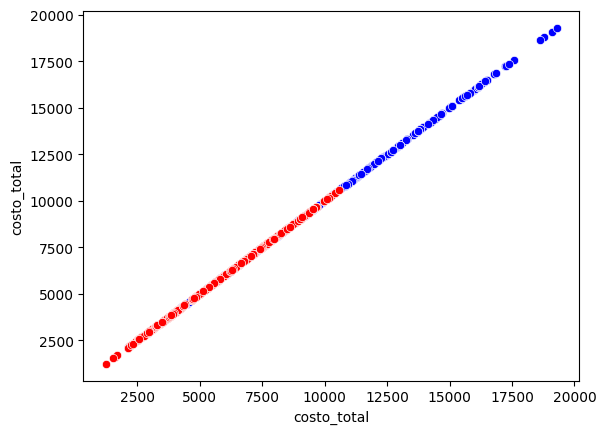

In [464]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='costo_total', y='costo_total', color="blue", data=df52)
sns.scatterplot(x='Predicciones4', y= 'Predicciones4', color="red", data=df52)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [465]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter4=model.score(X=Var_Indep4, y=Var_Dep4)
coef_Deter4

0.9941378104412399

In [466]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl4

0.9970645969250137

Precio vs Semana

In [467]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Var_Indep5= df52[['semana']]
Var_Dep5= df52['precio']

In [468]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep5, y=Var_Dep5)

LinearRegression()

In [469]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['semana'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([23.37116813]),
 'rank_': 1,
 'singular_': array([1484.51513671]),
 'intercept_': 321.3050648947292}

El modelo matematico es: y= 23.37116813x + 321.3050648947292

In [470]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Var_Indep5,Var_Dep5)

0.9459842990286769

In [471]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['semana']])
y_pred5= model.predict(X=df52[['semana']])
y_pred5

array([2938.87589525, 3593.26860284, 2938.87589525, 4341.14598294,
       3406.29925782, 2284.48318766, 3195.95874466, 3195.95874466,
       3195.95874466, 3406.29925782, 3710.12444348, 3546.52626658,
       4341.14598294, 2284.48318766, 7379.39783961, 2985.61823151,
       2354.59669205, 3195.95874466, 5369.47738058, 3195.95874466,
       5369.47738058, 3195.95874466, 4621.60000048, 5720.04490251,
       4925.42518615, 2377.96786018, 3195.95874466, 2004.02917012,
       3406.29925782, 4925.42518615, 4925.42518615, 2798.64888648,
       3008.98939964, 5392.84854871, 6047.2412563 , 3453.04159407,
       6911.97447704, 3453.04159407, 2518.19486894, 3453.04159407,
       3453.04159407, 5392.84854871, 4925.42518615, 2331.22552392,
       3242.70108092, 5720.04490251, 3008.98939964, 3943.83612476,
       2354.59669205, 3499.78393033, 5813.52957502, 2564.9372052 ,
       4808.56934551, 4598.22883235, 3219.32991279, 2728.5353821 ,
       4341.14598294, 7379.39783961, 2074.14267451, 5416.21971

<Axes: xlabel='precio', ylabel='precio'>

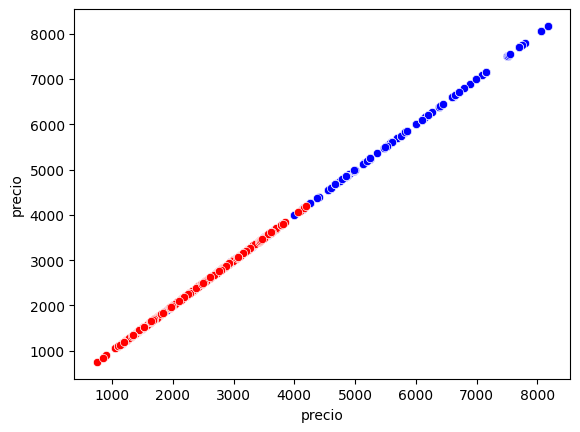

In [472]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='precio', y='precio', color="blue", data=df52)
sns.scatterplot(x='Predicciones5', y= 'Predicciones5', color="red", data=df52)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [473]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter5=model.score(X=Var_Indep5, y=Var_Dep5)
coef_Deter5

0.9459842990286769

In [474]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl5=np.sqrt(coef_Deter5)
coef_Correl5

0.9726172417907657

Precio vs Pagos realizados

In [475]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Var_Indep6= df52[['pagos_realizados']]
Var_Dep6= df52['precio']

In [476]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep6, y=Var_Dep6)

LinearRegression()

In [477]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['pagos_realizados'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-14.1109802]),
 'rank_': 1,
 'singular_': array([346.02372751]),
 'intercept_': 4898.83754672015}

El modelo matematico es: y= -14.1109802x + 4898.83754672015

In [478]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Var_Indep6,Var_Dep6)

0.018736132704731734

In [479]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['semana']])
y_pred6= model.predict(X=df52[['pagos_realizados']])
y_pred6

array([4574.28500218, 4150.95559626, 4644.83990317, 4023.95677448,
       4207.39951705, 4221.51049725, 4574.28500218, 4800.06068534,
       4898.83754672, 4898.83754672, 4179.17755666, 4898.83754672,
       4489.619121  , 4898.83754672, 4898.83754672, 4052.17873488,
       4306.17637843, 4094.51167547, 4898.83754672, 4898.83754672,
       4687.17284376, 4348.50931902, 4235.62147745, 4898.83754672,
       4306.17637843, 4898.83754672, 4715.39480415, 4616.61794277,
       4743.61676455, 4729.50578435, 4729.50578435, 4898.83754672,
       4842.39362593, 4898.83754672, 4898.83754672, 4729.50578435,
       4757.72774475, 4150.95559626, 4898.83754672, 4898.83754672,
       4150.95559626, 4898.83754672, 4898.83754672, 4433.17520021,
       4757.72774475, 4150.95559626, 4743.61676455, 4320.28735863,
       4898.83754672, 4348.50931902, 4898.83754672, 4898.83754672,
       4898.83754672, 4503.73010119, 4292.06539823, 4475.5081408 ,
       4785.94970514, 4898.83754672, 4179.17755666, 4785.94970

<Axes: xlabel='precio', ylabel='precio'>

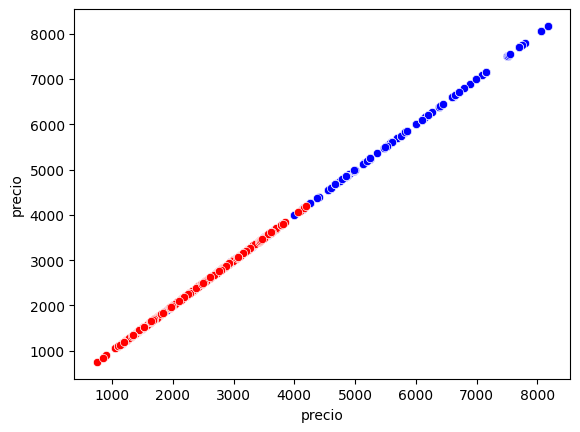

In [480]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='precio', y='precio', color="blue", data=df52)
sns.scatterplot(x='Predicciones6', y= 'Predicciones6', color="red", data=df52)

In [481]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter6=model.score(X=Var_Indep6, y=Var_Dep6)
coef_Deter6

0.018736132704731734

In [482]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl6=np.sqrt(coef_Deter6)
coef_Correl6

0.1368799938074653

In [483]:
#Unimos las variables utilizadas en un nuevo dataframe
df_ejercicio52= df52[["precio", "monto_financiado", "costo_total", "semana", "pagos_realizados"]]

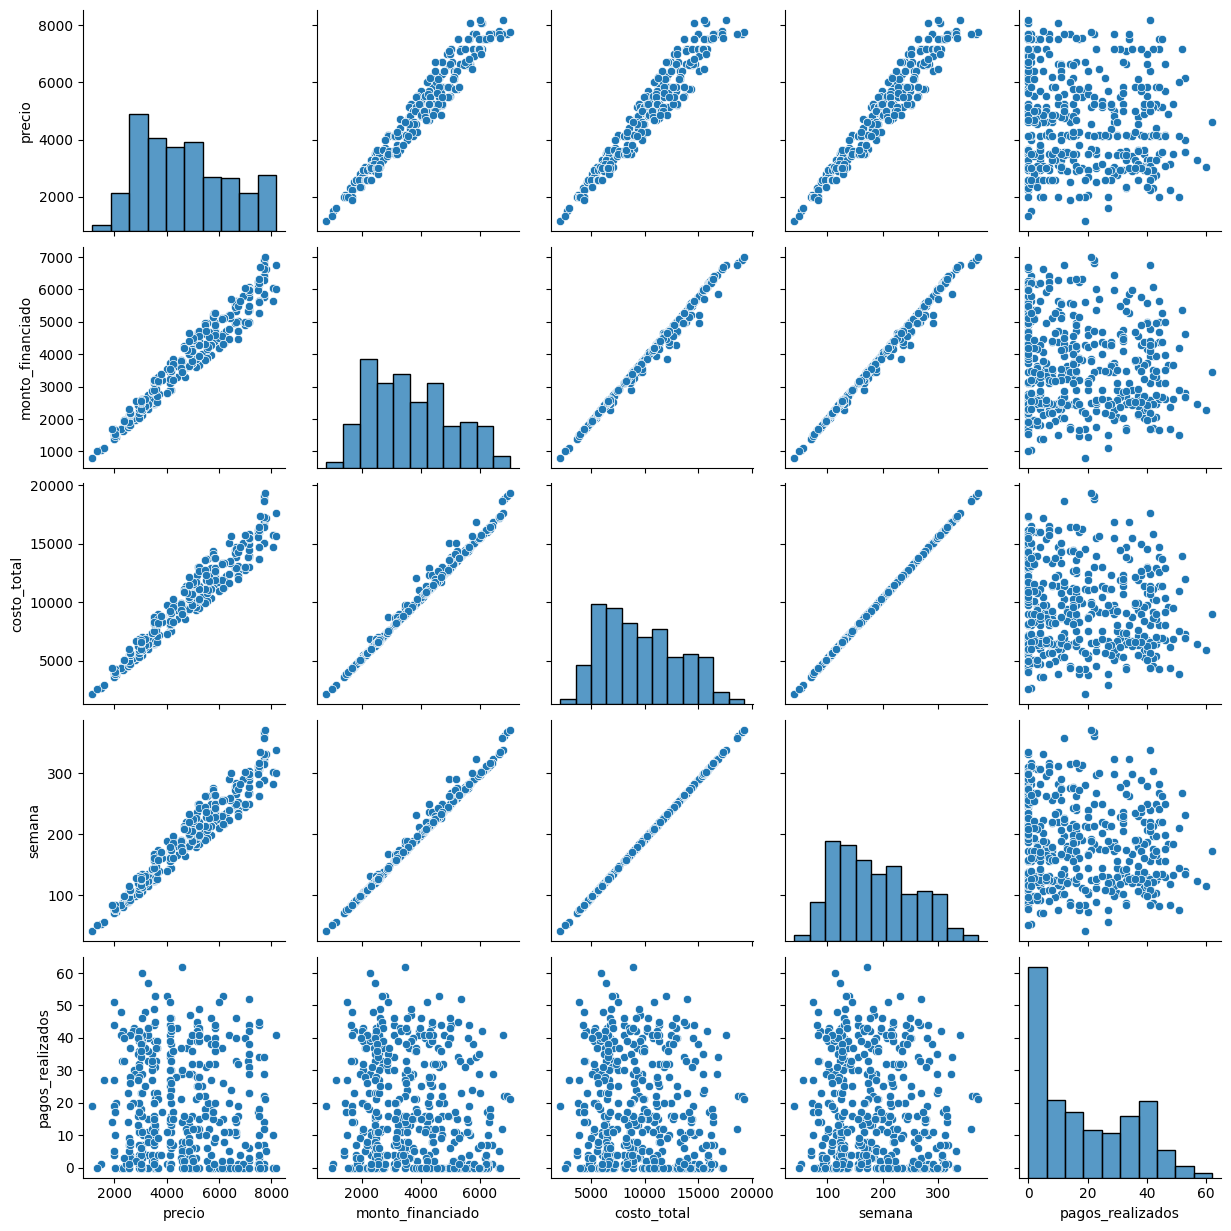

In [484]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(df_ejercicio52)

In [485]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors52=df_ejercicio52.corr()
Corr_Factors52

,precio,monto_financiado,costo_total,semana,pagos_realizados
precio,1.000000,0.976008,0.972617,0.972617,-0.136880
monto_financiado,0.976008,1.000000,0.997065,0.997065,-0.141860
costo_total,0.972617,0.997065,1.000000,1.000000,-0.140104
semana,0.972617,0.997065,1.000000,1.000000,-0.140104
pagos_realizados,-0.136880,-0.141860,-0.140104,-0.140104,1.000000


In [486]:
Corr_Factors52_1= abs(Corr_Factors52)
Corr_Factors52_1

,precio,monto_financiado,costo_total,semana,pagos_realizados
precio,1.000000,0.976008,0.972617,0.972617,0.136880
monto_financiado,0.976008,1.000000,0.997065,0.997065,0.141860
costo_total,0.972617,0.997065,1.000000,1.000000,0.140104
semana,0.972617,0.997065,1.000000,1.000000,0.140104
pagos_realizados,0.136880,0.141860,0.140104,0.140104,1.000000


<Axes: >

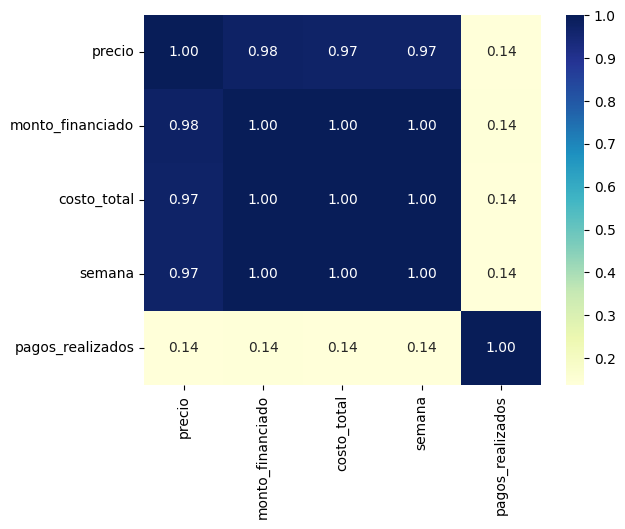

In [487]:
#Ajustamos el mapa de calor de los coeficientes de correlación
Heat_Map52= sns.heatmap(Corr_Factors52_1, cmap = 'YlGnBu', annot=True, fmt=".2f")
Heat_Map52